# **MODELO PREDICTIVO**

---



NOMBRE: ARACELY NICOLL DUEÑAS CONDORI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [3]:
img_path = "/content/drive/MyDrive/sportimages"
images, labels = [], []
print("Cargando imágenes...")

for root, dirs, files in os.walk(img_path):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png','.bmp','.tiff')):
            filepath = os.path.join(root,f)
            img = Image.open(filepath).resize((128,128)).convert('RGB')
            images.append(np.array(img)/127.0)  # Normalización
            labels.append(os.path.basename(root))

images = np.array(images, dtype=np.float32)
labels = np.array(labels)
print(f"Se cargaron {len(images)} imágenes.")

Cargando imágenes...
Se cargaron 24 imágenes.


In [4]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

train_X, test_X, train_Y, test_Y = train_test_split(images, labels_categorical, test_size=0.25, random_state=42)

print("Train X:", train_X.shape, "Train Y:", train_Y.shape)
print("Test X:", test_X.shape, "Test Y:", test_Y.shape)

Train X: (18, 128, 128, 3) Train Y: (18, 2)
Test X: (6, 128, 128, 3) Test Y: (6, 2)


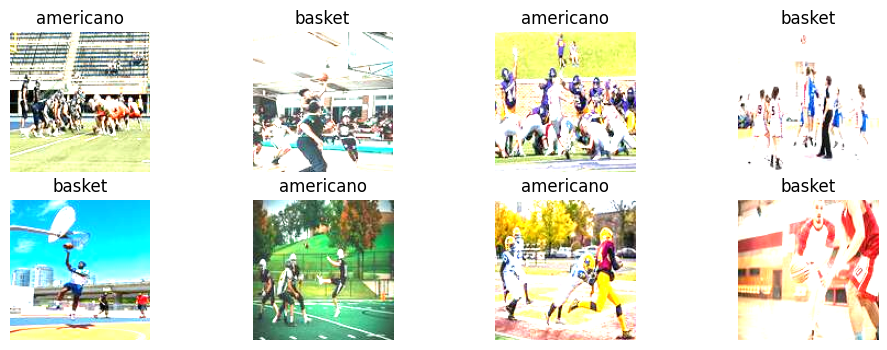

In [5]:
plt.figure(figsize=(12,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train_X[i])
    plt.title(label_encoder.inverse_transform([np.argmax(train_Y[i])])[0])
    plt.axis('off')
plt.show()

In [6]:
model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(128,128,3)),
    LeakyReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),padding='same'),
    LeakyReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),padding='same'),
    LeakyReLU(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(labels_categorical.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,938 (16.36 MB)

 Trainable params: 4,287,938 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=30, batch_size=16)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6429 - loss: 0.6332 - val_accuracy: 0.7500 - val_loss: 5.5575
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 15.9155 - val_accuracy: 0.2500 - val_loss: 3.0363
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7143 - loss: 1.2820 - val_accuracy: 0.2500 - val_loss: 5.0229
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 3.7323 - val_accuracy: 0.2500 - val_loss: 1.3229
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - accuracy: 0.6429 - loss: 0.7881 - val_accuracy: 0.7500 - val_loss: 0.3970
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.6429 - loss: 1.9670 - val_accuracy: 0.7500 - val_loss: 0.3839
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - accuracy: 0.5714 - loss: 2.2771 - val_accuracy: 1.0000 - val_loss: 0.2975
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.6429 - loss: 1.1818 - val_accuracy: 0.2500 - val_loss: 0.6922
Epo

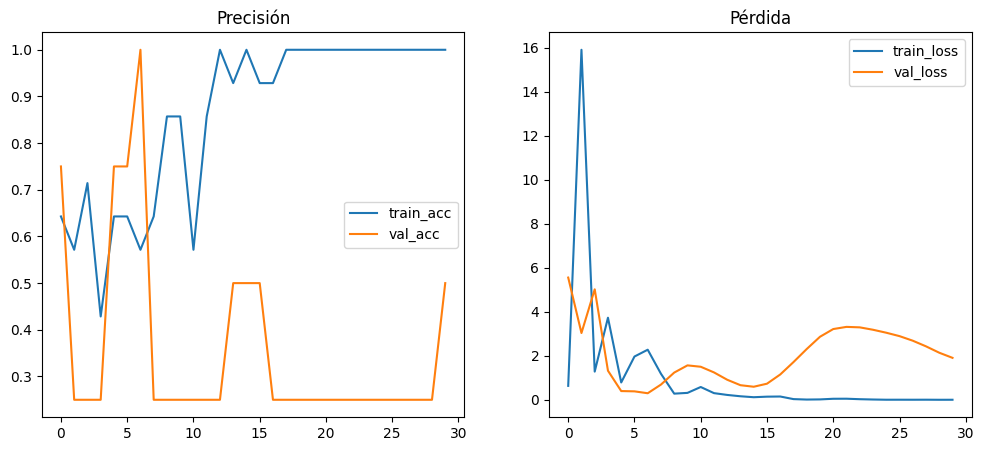

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Pérdida')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=2)
print(f'Precisión en el conjunto de prueba: {test_acc*100:.2f}%')

y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_Y, axis=1)

print("\nReporte de clasificación por clase:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

print("\nMatriz de confusión:")
print(confusion_matrix(y_true, y_pred_classes))

1/1 - 0s - 88ms/step - accuracy: 0.6667 - loss: 1.8797
Precisión en el conjunto de prueba: 66.67%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

Reporte de clasificación por clase:
              precision    recall  f1-score   support

   americano       0.75      0.75      0.75         4
      basket       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6


Matriz de confusión:
[[3 1]
 [1 1]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


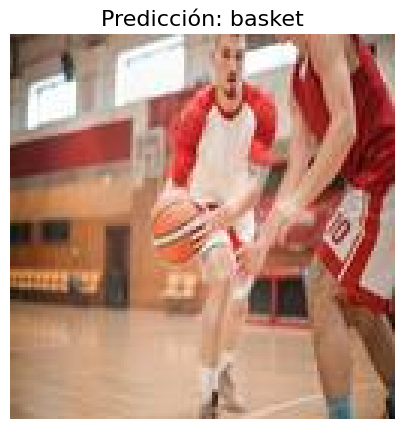

La predicción del modelo es: basket


In [20]:
def predict_image(model, label_encoder, image_path):
    img = Image.open(image_path).resize((128,128)).convert('RGB')
    img_array = np.array(img)/127.0
    img_array_exp = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array_exp)
    label = label_encoder.inverse_transform([np.argmax(pred)])
    return label[0], img_array


# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def predict_and_show(model, label_encoder, image_path):
    """
    model: modelo entrenado (Keras)
    label_encoder: codificador de etiquetas (LabelEncoder)
    image_path: ruta de la imagen a predecir
    """

    img = Image.open(image_path).resize((128,128)).convert('RGB')


    img_array = np.array(img) / 127.0
    img_array_exp = np.expand_dims(img_array, axis=0)

 # Predicción
    prediction = model.predict(img_array_exp)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    # Mostrar imagen correctamente
    plt.figure(figsize=(5,5))
    plt.imshow((img_array * 127).astype('uint8'))
    plt.axis('off')
    plt.title(f'Predicción: {predicted_label}', fontsize=16)
    plt.show()

    return predicted_label

# --- Uso ---
image_path = "/content/drive/MyDrive/sportimages/basket/pexels-olly-3755442.jpg"
pred_label = predict_and_show(model, label_encoder, image_path)
print(f"La predicción del modelo es: {pred_label}")
